In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import itertools

In [2]:
needItrateAgain = True

In [3]:
def hardLimit(data):
    return 1 if data > 0 else 0

In [4]:
def updateWeights(oldWeights,error,inputs,bias):
    if(error != 0):
        global needItrateAgain
        needItrateAgain = True
        inputs = np.dot(inputs , error)
        bias = bias + error
        return np.add(inputs , oldWeights),bias
    else:
        return oldWeights,bias

In [5]:
def calculateError(target,predict):
    return target - predict

In [6]:
def calculateInputs(inputs , weights, bias):
    multiplaction = inputs * weights 
    sum = np.sum(multiplaction)
    return sum + bias

In [8]:
def itrateDataRecords(inputs,targets,weights,bias):
    for i in range(np.size(inputs,0)):
        calculate = calculateInputs(inputs[i] ,weights, bias)
        predict = hardLimit(calculate)
        error = calculateError(targets[i],predict)
        weights , bias = updateWeights(weights , error ,inputs[i], bias)
    return weights,bias
        

In [11]:
def perceptron(baseInputs , basetargets):
    iteration = 0
    iteration_limit = 100
    global needItrateAgain
    needItrateAgain = True
    
    inputs = np.array(baseInputs)
    targets = np.array(basetargets)
    weights = [np.random.random() for x in range(inputs.shape[1])]
    bias = np.random.random()

    while((needItrateAgain and iteration < iteration_limit)):
        print("---------------------------")
        needItrateAgain = False
        weights,bias = itrateDataRecords(inputs , targets,weights,bias)
        print(weights , bias)
        iteration = iteration + 1
        print(iteration)

    print(f"weights:{weights}, bias:{bias}")
    weights = np.append(weights , bias)
    return weights

In [12]:
def seperateDataByOutputs(outputs):
    outputsList = []
    for i in range(outputs.shape[1]) :
        output = [item[i] for item in outputs]
        outputsList.append(output)
    
    return np.array(outputsList)

In [13]:
def showChart(inputs,targets, weightsList):
    inputsXGroup = []
    inputsYGroup = []
    marker = itertools.cycle((',', '+', '.', 'o', '*')) 

    targetsSet = np.unique(targets, axis=0)
    for i in targetsSet:
        Xlist = []
        Ylist  = []
        for size,input in enumerate(inputs):
            if (targets[size] == i).all():
                Xlist.append(input[0])
                Ylist.append(input[1])
        
        inputsXGroup.append(Xlist)
        inputsYGroup.append(Ylist)
    

    xlist = np.linspace(-5.0, 5.0, 100)
    ylist = np.linspace(-5.0, 5.0,100) 
    X,Y = np.meshgrid(xlist, ylist)


    for i in weightsList:
        F = i[0]*X + i[1]*Y + i[2]
        plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')

    for i,v in enumerate(inputsXGroup):
        plt.scatter(inputsXGroup[i], inputsYGroup[i], color= "red",  marker= next(marker), s=30)

    # specifying horizontal line type 
    plt.axhline(y = 0, color = 'b', linestyle = '-') 
    plt.axvline(x=0,color = "b" , linestyle = '-')
    
    plt.legend() 
    plt.show()

In [17]:
def perceptronClassification(inputs,outputs):
    inputs = np.array(inputs)
    targets = np.array(outputs)
    outputList = seperateDataByOutputs(targets)
    weightsList = []

    for i in range(outputList.shape[0]):
        weightsList.append(perceptron(inputs , outputList[i]))

    print(f"weights1{weightsList}")
    showChart(inputs , targets , weightsList)

---------------------------
[-2.28689128  0.10847968] -1.0984981059808776
1
---------------------------
[-2.28689128  0.10847968] -1.0984981059808776
2
weights:[-2.28689128  0.10847968], bias:-1.0984981059808776
---------------------------
[-1.63078464 -4.06873196] 1.757902990911546
1
---------------------------
[ 0.36921536 -4.06873196] 2.7579029909115462
2
---------------------------
[ 0.36921536 -4.06873196] 2.7579029909115462
3
weights:[ 0.36921536 -4.06873196], bias:2.7579029909115462
weights1[array([-2.28689128,  0.10847968, -1.09849811]), array([ 0.36921536, -4.06873196,  2.75790299])]


/var/folders/mw/00nb0zwj2bxgkkr5l0md1_l80000gn/T/ipykernel_5485/37028840.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


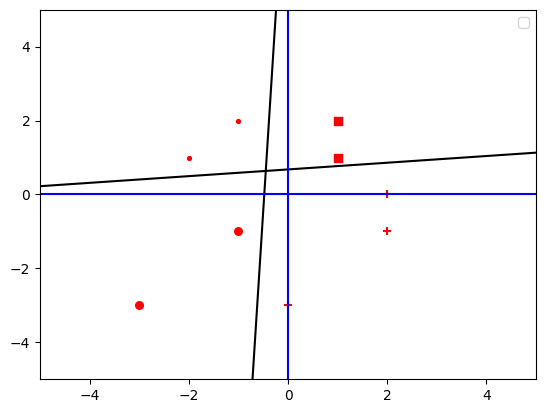

In [19]:
inputs = [[1,1],[1,2],[2,-1],[2,0],[-1,2],[-2,1],[-1,-1],[-3,-3],[0,-3]]
outputs = [[0,0],[0,0],[0,1],[0,1],[1,0],[1,0],[1,1],[1,1],[0,1]]

perceptronClassification(inputs , outputs)